In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys

## Bash script

In [2]:
import os
files = []
for file in os.listdir("./"):
    if file.endswith(".txt"):
        files.append(file)

In [3]:
def read_file(file_name):
    with open(file_name) as f:
        data = f.readlines()
    return data

# Rollup

In [23]:
data = read_file("rollup.txt")
    
times = {}
times["Dataset Size"] = []
times["Model"] = []
times["Number of rollup attributes"] = []
times["Time (in ms)"] = []


times

query_name = ""

for line in data:
    if line.startswith("- "):
        query_name = line[2:-1].split(",")
        dataset, attr_nb = query_name[0].split()[-1], len(line.split(")")[0].split("(")[-1].split(","))

    if line.startswith("--- "):
        if line.split()[2] == "original:":
            continue
        times["Dataset Size"].append(dataset)
        times["Number of rollup attributes"].append(attr_nb)
        times["Model"].append(line.split()[2][:-1])
        times["Time (in ms)"].append(float(line.split()[-1][:-2]))

df_times = pd.DataFrame.from_dict(times) 



In [24]:
sns.set(style="whitegrid", font_scale=3)

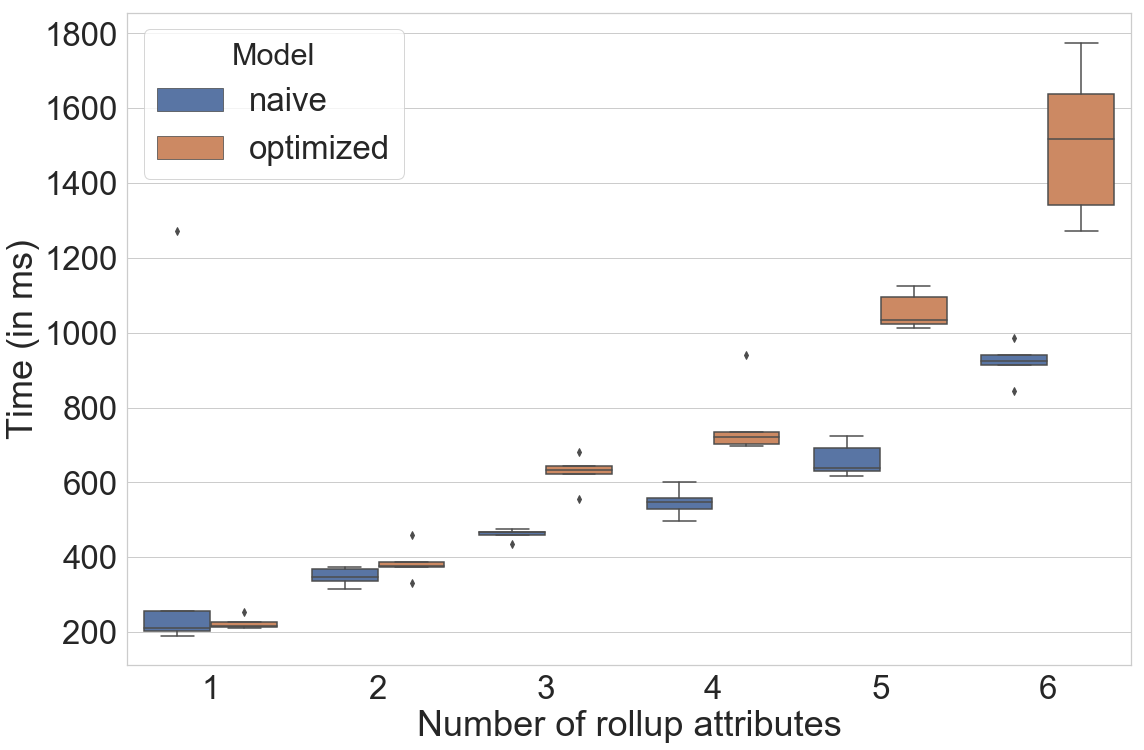

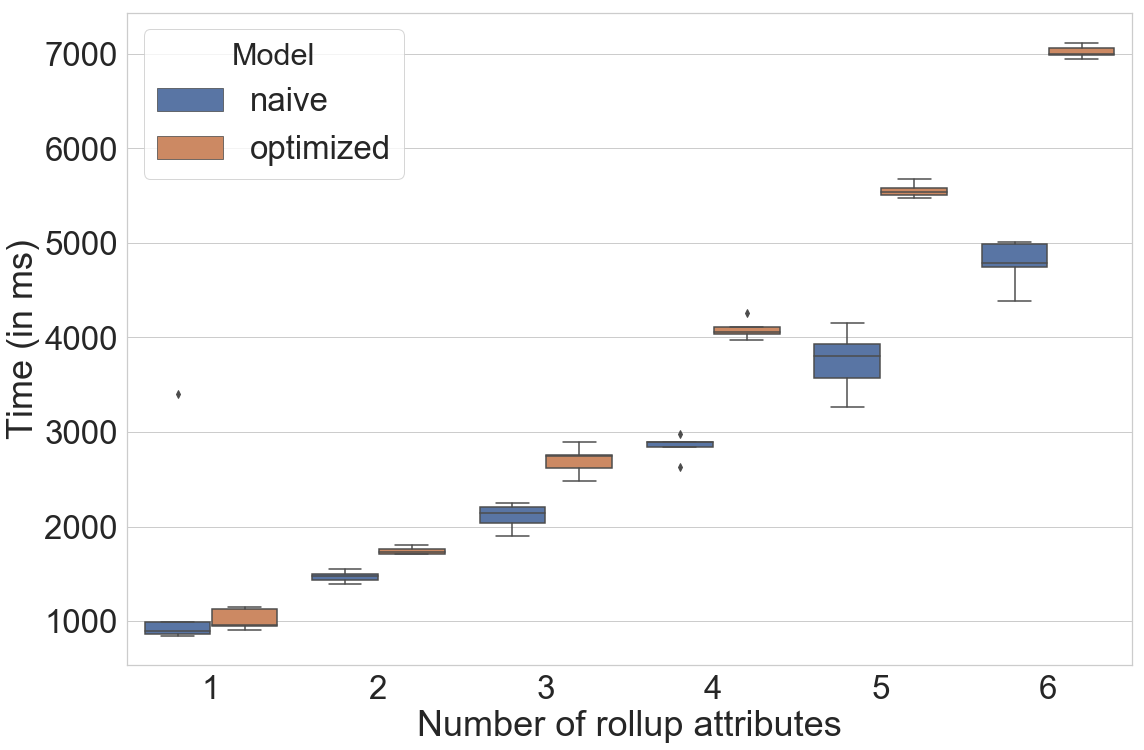

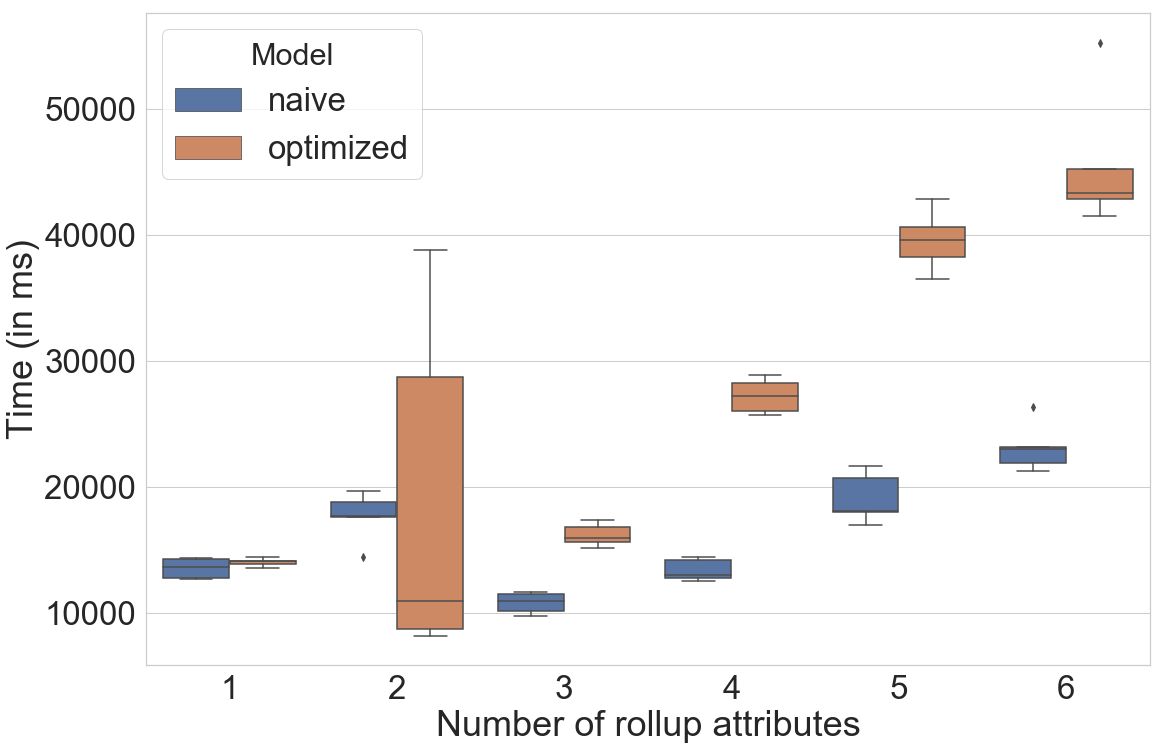

In [25]:
for dataset in df_times["Dataset Size"].unique():
    plt.figure(figsize=(18, 12))
    
    sns.boxplot(data=df_times[df_times["Dataset Size"]==dataset], x="Number of rollup attributes", y="Time (in ms)", hue="Model")
    plt.savefig(f'images/Rollup_{dataset}.png')
    plt.show()

# LSH

In [22]:
data = read_file("lsh-time-base.txt")
    
times = {}
times["Dataset Size"] = []
times["Query Number"] = []
times["Model"] = []
times["Time (in ms)"] = []


times

query_name = ""

for line in data:
    if line.startswith("- "):
        query_name = line[2:-1].split(", ")
        dataset, q_nb = query_name[0].split()[-1], query_name[1]
        

    if line.startswith("--- "):
        if " ".join(line.split()[2:-2]) == "":
            times["Model"].append(" ".join(line.split()[2:-1])[:-1])
        else: 
            if line.split()[-2] == "init:":
                continue
            times["Model"].append(" ".join(line.split()[2:-2]))
            
        
        times["Dataset Size"].append(dataset)
        times["Query Number"].append(q_nb)
        
        times["Time (in ms)"].append(float(line.split()[-1][:-2]))

df_times = pd.DataFrame.from_dict(times) 


--- Time LSH Broadcast eval: 1707.551945ms

--- Time LSH Broadcast eval: 1675.558194ms

--- Time LSH Broadcast eval: 1682.50212ms

--- Time LSH Broadcast eval: 129.773911ms

--- Time LSH Broadcast eval: 184.216377ms

--- Time LSH Broadcast eval: 1651.13509ms

--- Time LSH Broadcast eval: 156.97686ms

--- Time LSH Broadcast eval: 110.207263ms

--- Time LSH Broadcast eval: 110.549588ms

--- Time LSH Broadcast eval: 79.630083ms

--- Time LSH Broadcast eval: 107.742317ms

--- Time LSH Broadcast eval: 81.262143ms

--- Time LSH Broadcast eval: 83.105423ms

--- Time LSH Broadcast eval: 82.48434ms

--- Time LSH Broadcast eval: 72.649822ms

--- Time LSH Broadcast eval: 72.337361ms

--- Time LSH Broadcast eval: 67.196922ms

--- Time LSH Broadcast eval: 64.53221ms

--- Time LSH Broadcast eval: 100.381609ms

--- Time LSH Broadcast eval: 69.879477ms

--- Time LSH eval: 986.080529ms

--- Time LSH eval: 352.733932ms

--- Time LSH eval: 344.28773ms

--- Time LSH eval: 291.177369ms

--- Time LSH eval: 

In [8]:
df_times

,Dataset Size,Query Number,Model,Time (in ms)
0,small,query 0,LSH Broadcast,1707.551945
1,small,query 0,LSH Broadcast,1675.558194
2,small,query 0,LSH Broadcast,1682.502120
3,small,query 0,LSH Broadcast,129.773911
4,small,query 0,LSH Broadcast,184.216377
...,...,...,...,...
321,big,query 7,LSH,590.576912
322,big,query 7,LSH,666.987095
323,big,query 7,LSH,661.149847
324,big,query 7,LSH,760.192015


small


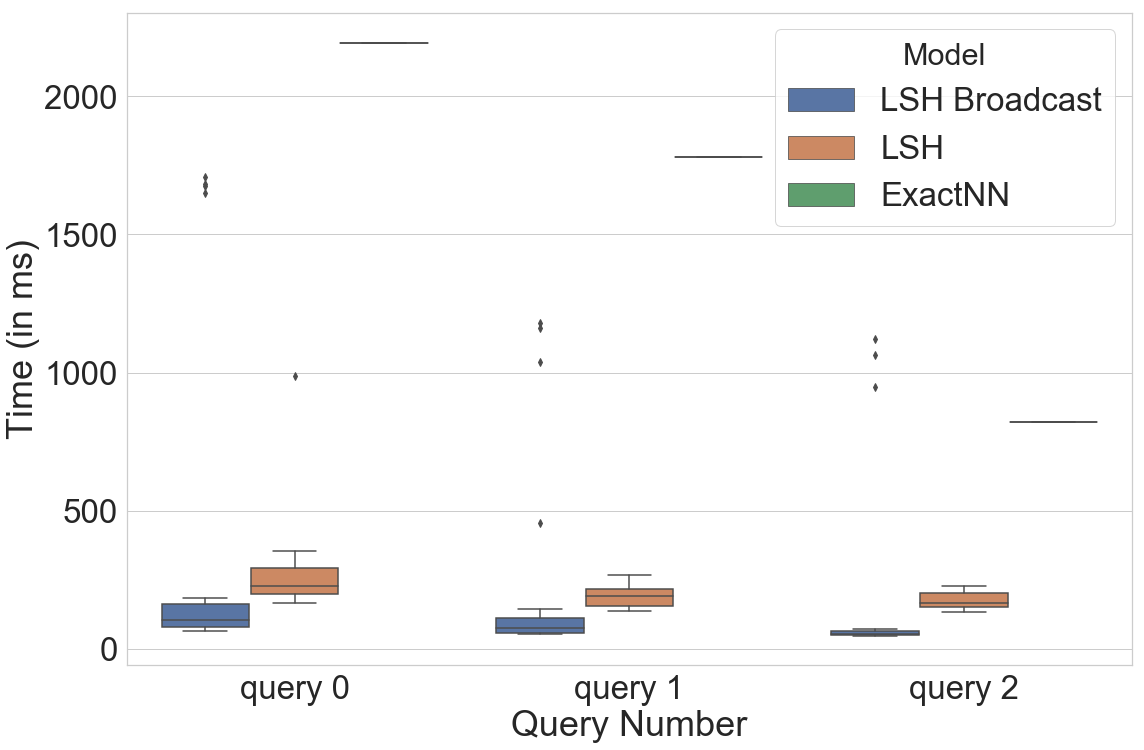

medium


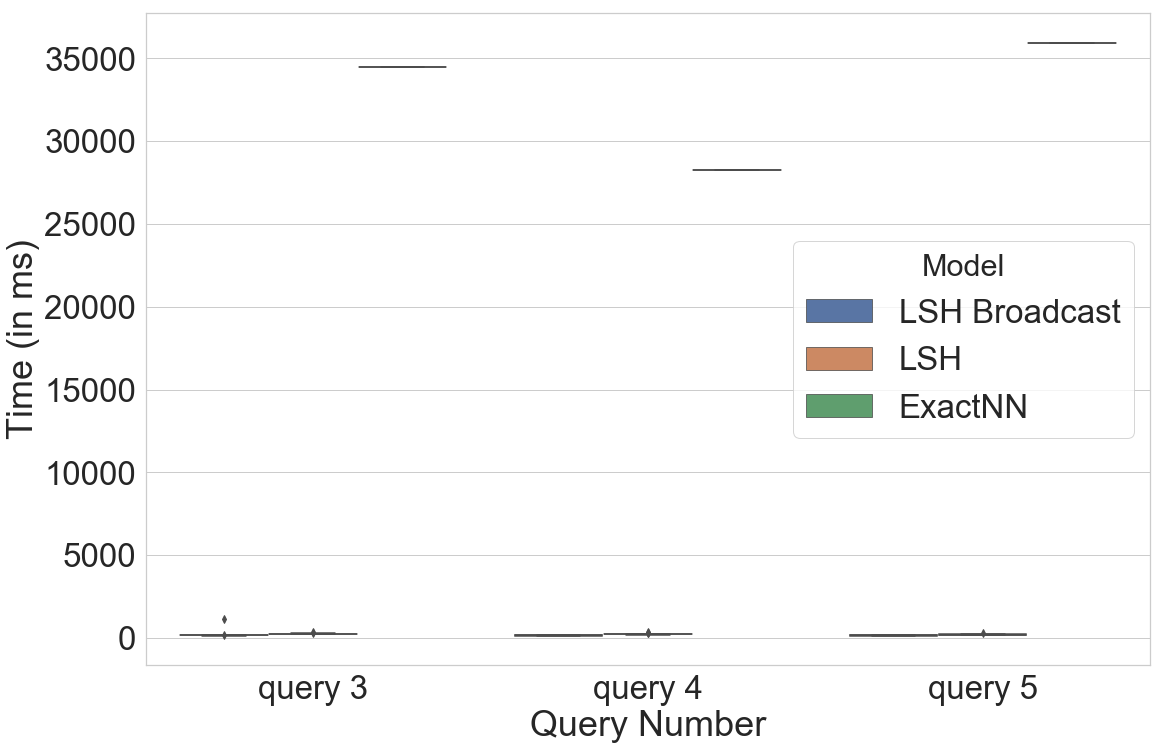

big


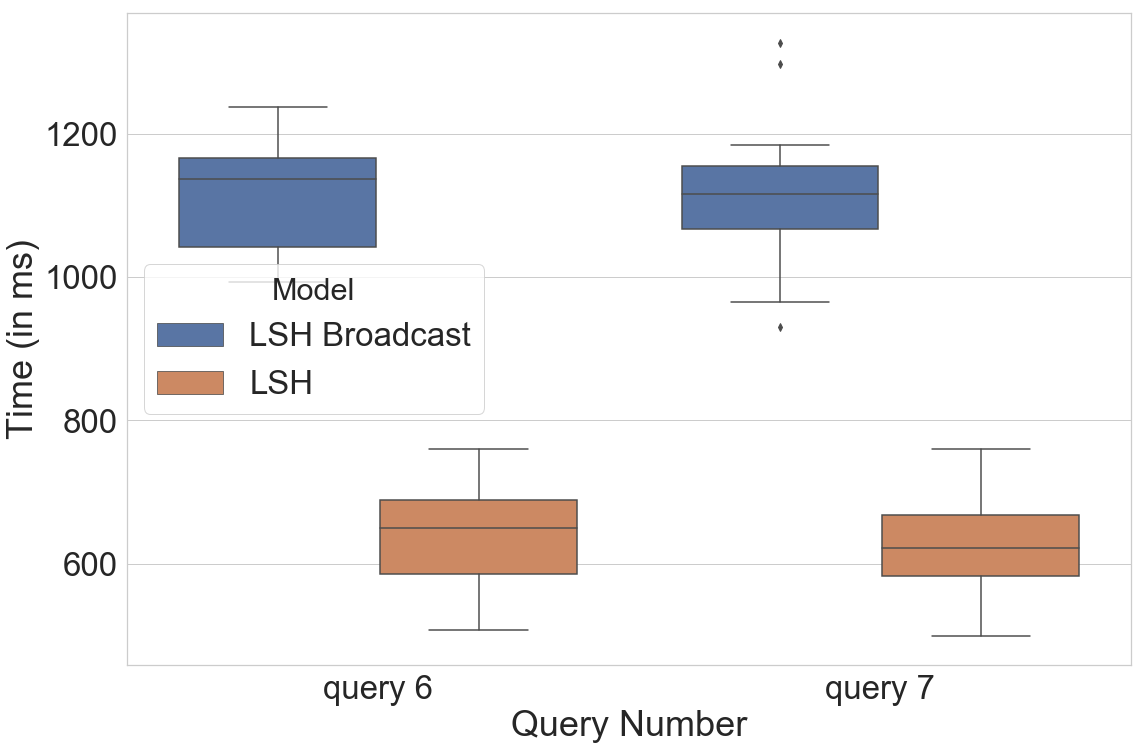

In [9]:
for dataset in df_times["Dataset Size"].unique():
    print(dataset)
    plt.figure(figsize=(18, 12))
    sns.boxplot(data=df_times[df_times["Dataset Size"]==dataset], x="Query Number", y="Time (in ms)", hue="Model")
    #plt.savefig(f'images/lsh_{dataset}.png')
    plt.show()

# Theta

In [17]:
def read_theta(file_name):
    data = read_file(file_name)

    times = {}
    times["Dataset Size"] = []
    times["Number of partitions"] = []
    times["Model"] = []
    times["Time (in ms)"] = []

    query_name = ""

    cartesian = {}
    cartesian["Dataset Size"] = []
    cartesian["Time (in ms)"] = []
    
    
    for line in data:

        if line.startswith("--- "):
            
            if "cartesian" in line:
                size, time = line[4:].split(": ")
                cartesian["Dataset Size"].append(size.split()[-1])
                cartesian["Time (in ms)"].append(float(time[:-3]))
            else:
                size, rest = line[4:].split(", ")
                part_nb, time = rest.split(": ")
                
                times["Dataset Size"].append(size.split()[-1])
                times["Number of partitions"].append(part_nb.split()[-1])

                times["Model"].append("Theta Join")
                times["Time (in ms)"].append(float(time[:-3]))

    return pd.DataFrame.from_dict(times), pd.DataFrame.from_dict(cartesian)

In [18]:
df_time_theta, cartesian = read_theta("theta.txt")
#df_cart = read_theta("theta-cart.txt", True)

In [19]:
df_theta_all = pd.concat([df_time_theta])#, df_cart])

In [13]:
 #+ ["cartesian"]

Dataset size : 1000
mean : 959.697113
variance : 24.17630208557121
Dataset size : 2000
mean : 1157.9798426
variance : 100.03756936241435
Dataset size : 4000
mean : 1569.5058984
variance : 104.15405264702567
Dataset size : 8000
mean : 2362.3682402
variance : 134.9489740868259
Dataset size : 16000
mean : 3866.7864984
variance : 91.39879111944656
Dataset size : 32000
mean : 8016.3654542
variance : 334.44519203525533


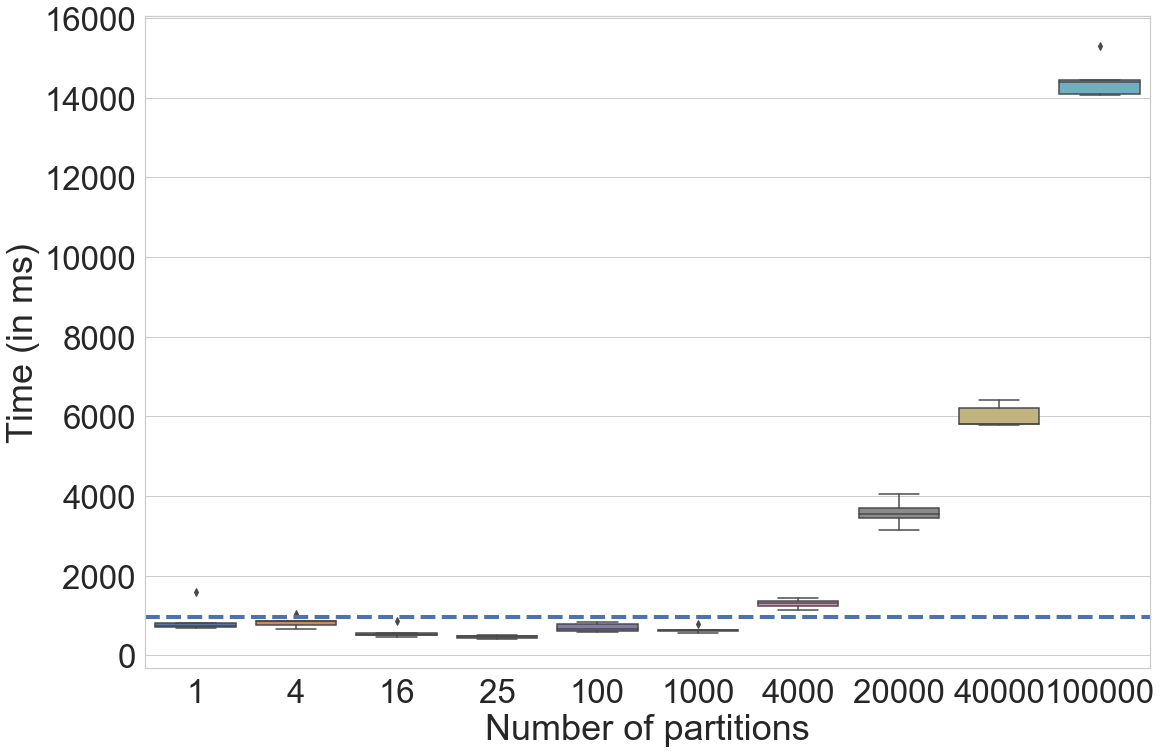

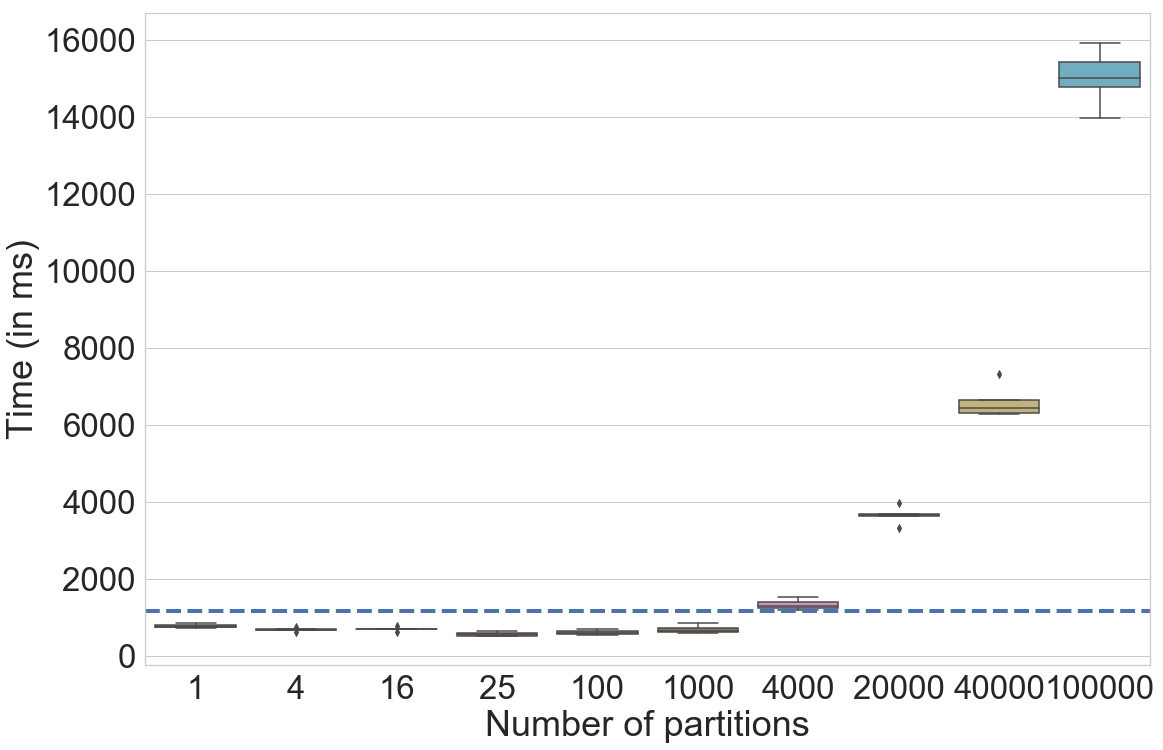

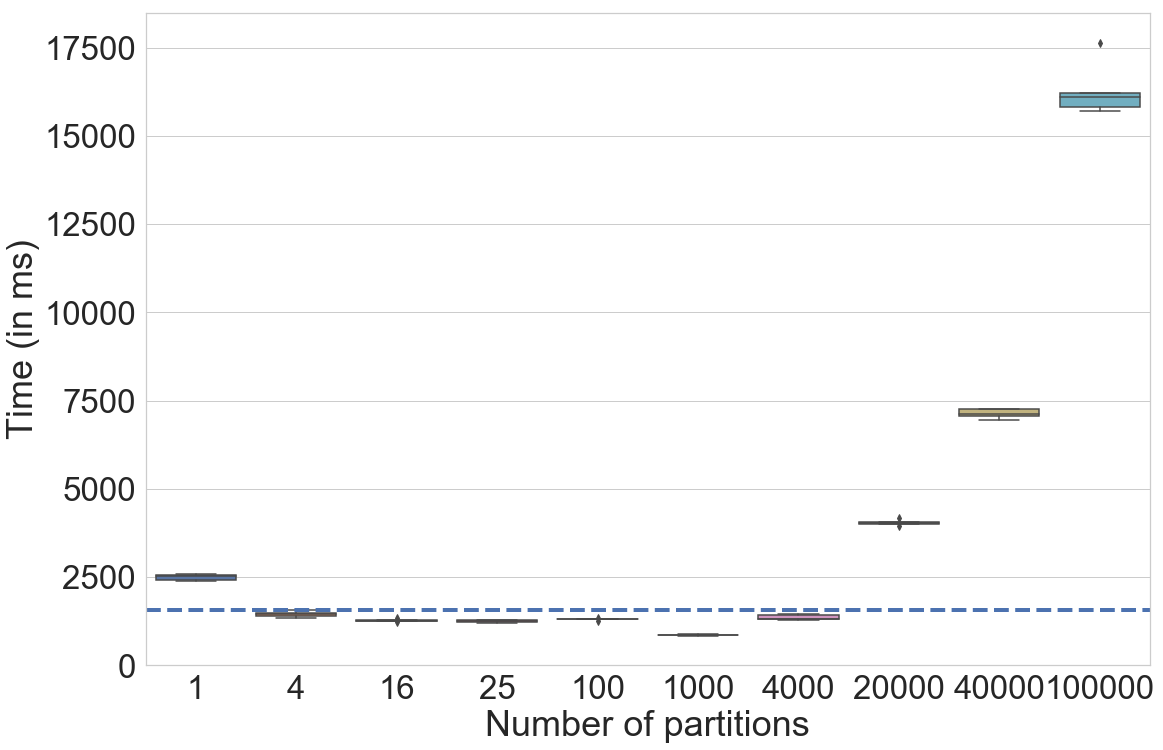

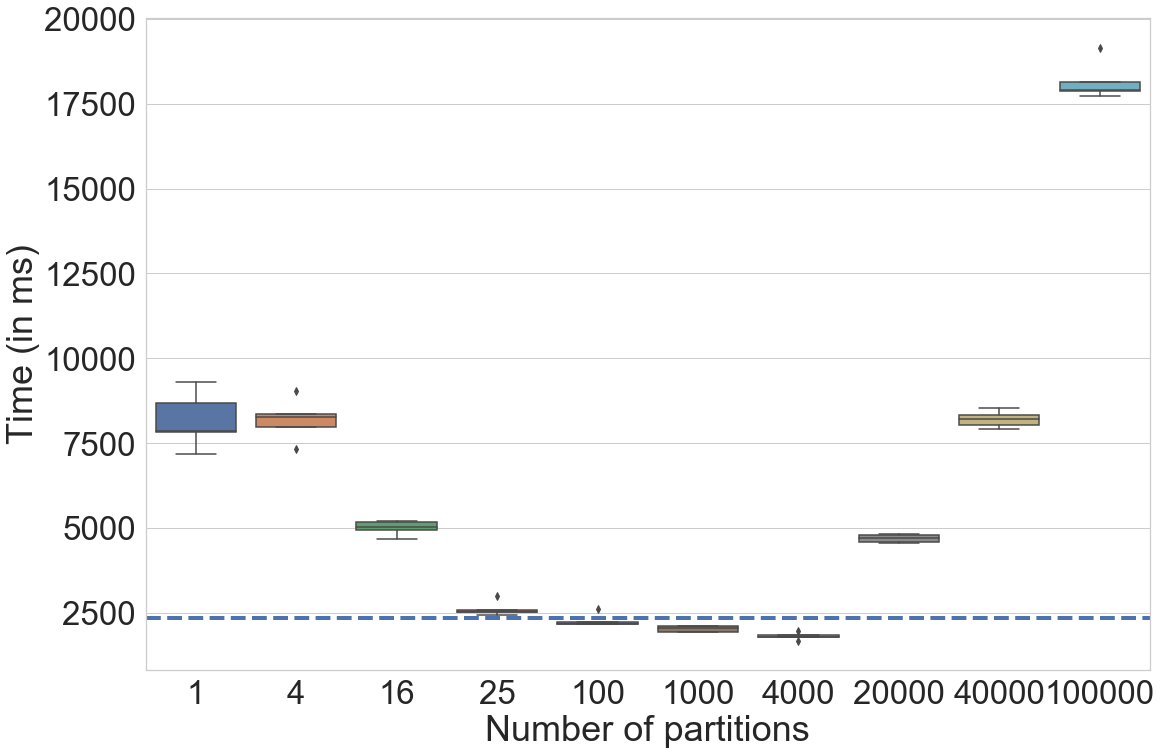

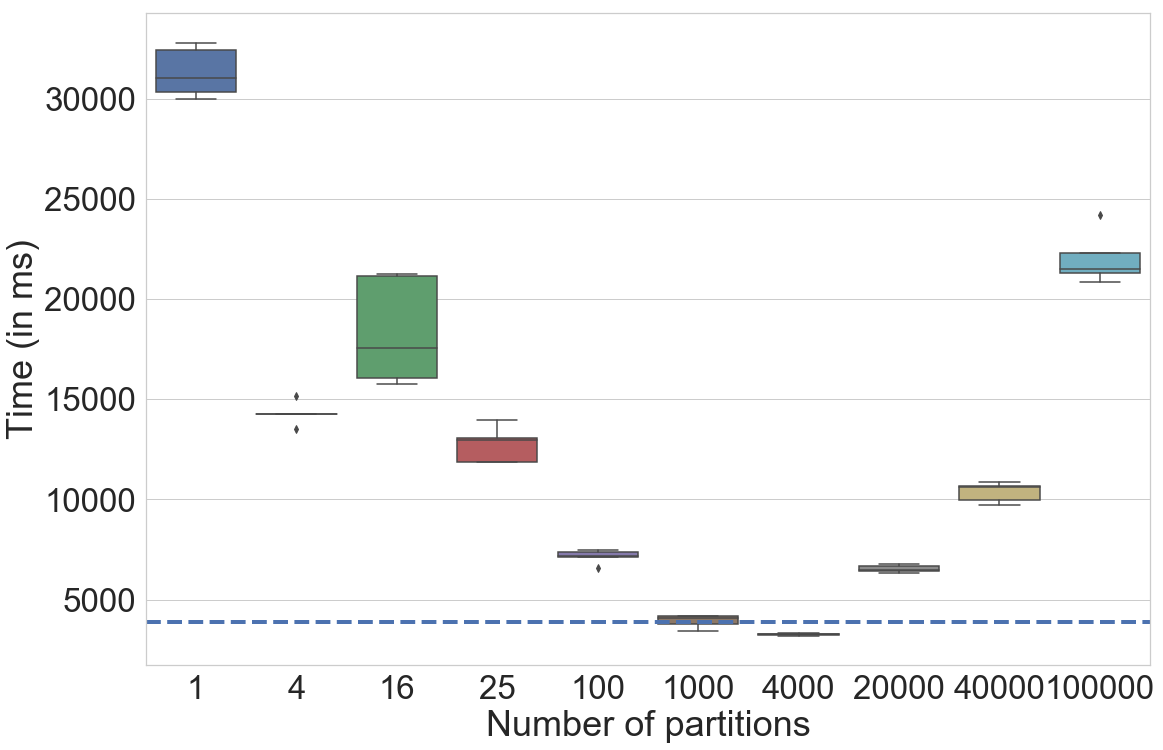

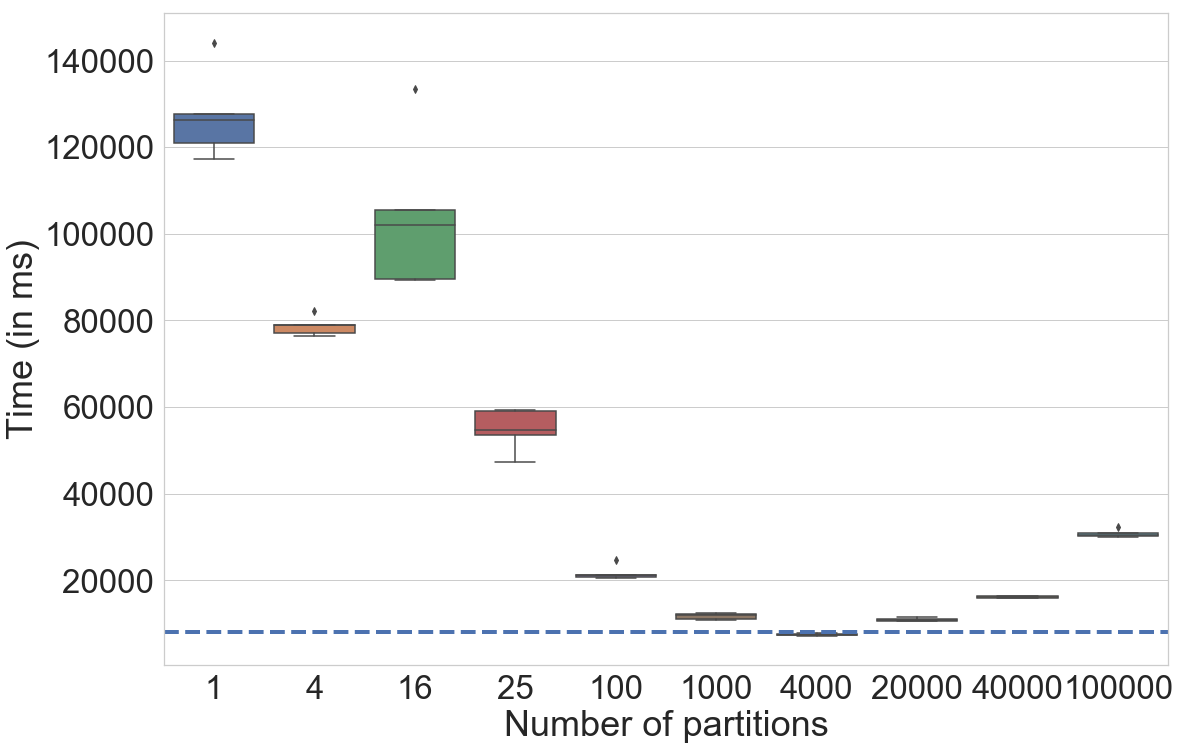

In [20]:
for dataset in df_time_theta["Dataset Size"].unique():
    
    partition_array = [int(i) for i in df_time_theta[df_theta_all["Dataset Size"] == dataset]["Number of partitions"].unique()]
    partition_array.sort()
    partition_array = [str(i) for i in partition_array]
    print(f"Dataset size : {dataset}")
    print(f"mean : {cartesian[cartesian['Dataset Size'] == dataset]['Time (in ms)'].mean()}")
    print(f"variance : {cartesian[cartesian['Dataset Size'] == dataset]['Time (in ms)'].std()}")
    plt.figure(figsize=(18, 12))
    
    ax = sns.boxplot(data=df_theta_all[df_theta_all["Dataset Size"] == dataset], x="Number of partitions", y="Time (in ms)", order=partition_array)
    ax.axhline(cartesian[cartesian["Dataset Size"] == dataset]["Time (in ms)"].mean(), ls='--', lw =4)
    
    plt.savefig(f'images/theta_{dataset}.png')